#                                           KMeans - Fish Dataset

### I have used the following tools and concepts to build a model for the Fish Dataset:
* Pandas
* Numpy
* Matplotlib 
* Scikit-learn
* KMeans-Clustering
* Elbow-Point (Determining optimal number of clusters)
* StandardScaler
* Pipelining

In [44]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [45]:
# Importing the dataset
dataset = pd.read_csv("Fish.csv", header=None)
dataset.head()

,0,1,2,3,4,5,6
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1


In [46]:
# Assigning variables for clustering
X = dataset.iloc[:, 1:]
y = dataset.iloc[:, 0]

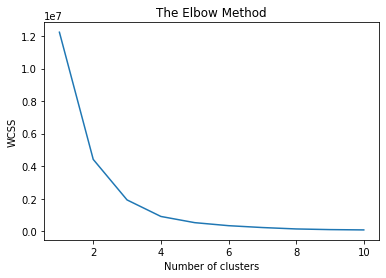

In [47]:
# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Inference
* From the above plot, the elbow point can be clearly observed at 4.
* Therefore the optimal number of clusters is 4.

In [48]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
labels = kmeans.fit_predict(X)

In [49]:
# Creating a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels':labels, 'species': y})

# Creating crosstab: ct
ct = pd.crosstab(df['labels'], df['species'])

# Displaying ct
print(ct)

species  Bream  Pike  Roach  Smelt
labels                            
0            1     1     17     14
1           16     2      0      0
2           17    10      3      0
3            0     4      0      0


### Inference
* From the above crosstabulation, it can be seen that cluster 0 is not satisfacory.
* Therefore, Scaling the data might provide a better clustering of the data.

In [50]:
# Creating scaler: scaler
scaler = StandardScaler()

# Creating KMeans instance: kmeans
kmeans = KMeans(n_clusters=4)

# Creating pipeline: pipeline
pipeline = make_pipeline(scaler, kmeans)

In [51]:
# Fitting the pipeline to samples
pipeline.fit(X)

# Calculating the cluster labels: labels
labels = pipeline.predict(X)

# Creating a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels':labels, 'species': y})

# Creating crosstab: ct
ct = pd.crosstab(df['labels'], df['species'])

# Displaying ct
print(ct)

species  Bream  Pike  Roach  Smelt
labels                            
0            1     0     19      1
1            0    17      0      0
2           33     0      1      0
3            0     0      0     13


### Inference
* From the above crosstabulation, it can be seen that the cluster 0 is more accurate than the model fitted without scaling.